In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club-loans-rejects-data/appl_accepted_20072019Q3.csv
/kaggle/input/lending-club-loans-rejects-data/appl_rejected_20072018Q4.csv


In [2]:
l_acpt = pd.read_csv('/kaggle/input/lending-club-loans-rejects-data/appl_accepted_20072019Q3.csv')
l_rjct = pd.read_csv('/kaggle/input/lending-club-loans-rejects-data/appl_rejected_20072018Q4.csv')



<ipython-input-2-d3529b943a51>:1: DtypeWarning: Columns (0,6,19,35,49,59,118,129,130,131,134,135,136,139,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  l_acpt = pd.read_csv('/kaggle/input/lending-club-loans-rejects-data/appl_accepted_20072019Q3.csv')


In [3]:
l_acpt.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650550 entries, 0 to 2650549
Columns: 150 entries, id to settlement_term
dtypes: float64(111), object(39)
memory usage: 3.0+ GB


In [4]:
l_acpt.head(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(l_acpt.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [6]:
l_acpt['loan_status'].value_counts(dropna=False)

loan_status
Current                                                1217855
Fully Paid                                             1111884
Charged Off                                             273973
Late (31-120 days)                                       27067
In Grace Period                                          11386
Late (16-30 days)                                         5558
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     45
NaN                                                         33
Name: count, dtype: int64

Loan status - is the column we are gonna predict using our Ml model.
we drop the features missing more than the 30% of the data.
and select only the features that would be available for an investor to decide wheter to fund the loan. 

NEST STEP IS TO CREATE A DROP LIST(features with missing value more than 30%).

In [7]:
#calculating missing value count in each column feature.
Missing_Values = l_acpt.isnull().mean().sort_values(ascending=True)
print(Missing_Values)

id                                            0.000000
fico_range_low                                0.000012
fico_range_high                               0.000012
revol_bal                                     0.000012
out_prncp                                     0.000012
                                                ...   
hardship_reason                               0.995827
hardship_type                                 0.995827
hardship_amount                               0.995827
orig_projected_additional_accrued_interest    0.996686
member_id                                     1.000000
Length: 150, dtype: float64


In [8]:
#printing all the features where the percentage of missing values is more than 0.3
drop_list = sorted(list(Missing_Values[Missing_Values > 0.3].index))
print(drop_list)




['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_ma

In [9]:
len(drop_list)

58

In [10]:

Main_list = sorted(list(Missing_Values[Missing_Values < 0.3].index))
print(Main_list)


['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m'

In [11]:
len(Main_list)

92

In [12]:
# Step 1: Drop Unnecessary Columns
cols_to_drop = ['id', 'url', 'zip_code', 'title', 'policy_code', 'application_type', 'pymnt_plan',
                'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d',
                'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_prncp', 
                'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']

Main_list = [col for col in Main_list if col not in cols_to_drop]
print(Main_list)
len(Main_list)


['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'purpose',

71

In [13]:
#BUILDING THE DATA FRAME WITH ONLY THE COLUMNS PRESENT IN MAIN LIST.
df_filtered = l_acpt[Main_list]
#print(df_filtered)



In [14]:
# Step 2: Filter Loan Status to "Fully Paid" & "Charged Off"
df_filtered = df_filtered[df_filtered['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Convert target to binary (1 = Charged Off, 0 = Fully Paid)
df_filtered['loan_status'] = df_filtered['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})



In [15]:
df_filtered.head(5)

,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,debt_settlement_flag,...,term,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,verification_status
0,0.0,4.0,PA,55000.0,20701.0,1506.0,37.2,0.0,0.0,N,...,36 months,722.0,144904.0,178050.0,13.0,7746.0,2400.0,13734.0,9300.0,Not Verified
1,0.0,4.0,SD,65000.0,9733.0,57830.0,27.1,0.0,0.0,N,...,36 months,0.0,204396.0,314017.0,38.0,39475.0,79300.0,24667.0,111800.0,Not Verified
2,0.0,6.0,IL,63000.0,31617.0,2737.0,55.9,0.0,0.0,N,...,60 months,0.0,189699.0,218418.0,18.0,18696.0,6200.0,14877.0,14000.0,Not Verified
4,0.0,10.0,PA,104433.0,27644.0,4567.0,77.5,0.0,0.0,N,...,60 months,0.0,331730.0,439570.0,35.0,95768.0,20300.0,88097.0,34000.0,Source Verified
5,0.0,0.0,GA,34000.0,2560.0,844.0,91.0,0.0,0.0,N,...,36 months,0.0,12798.0,16900.0,6.0,12798.0,9400.0,4000.0,12900.0,Source Verified


In [16]:
print(df_filtered['int_rate'].dtype)


object


In [17]:
# so no null values
print(df_filtered['int_rate'].isnull().sum())  # Check if any NaN values exist


0


In [18]:
# top 15 rows of interest rates/
print(df_filtered[['int_rate']].head(15))  # Prints first 5 rows of 'loan_status'

   int_rate
0     13.99
1     11.99
2     10.78
4     22.45
5     13.44
6      9.17
7      8.49
8      6.49
9     11.48
12    12.88
13    19.48
14     6.49
15     7.49
16     7.49
17    11.99


In [19]:
df_filtered['int_rate'] = pd.to_numeric(df_filtered['int_rate'], errors='coerce')


In [20]:
print(df_filtered['int_rate'].dtype)
print(df_filtered['int_rate'].unique())


float64
[13.99 11.99 10.78 22.45 13.44  9.17  8.49  6.49 11.48 12.88 19.48  7.49
 19.89 14.85  5.32 17.97 24.24 15.77  9.8  17.27 18.49  7.91 23.13 20.5
 16.59 18.99 26.06 21.48  6.99 27.49 26.99 27.99 28.49  6.   25.09 28.99
 16.55  7.89 12.59 13.67 10.64  7.26 17.86 14.48 13.18  6.24  8.38 15.41
  9.76 21.99 16.99 25.99 17.57 18.2  22.99  6.89 11.22 19.99 27.31 20.99
 27.88 23.99 24.99 26.77 12.05  8.18  9.99 11.49 10.99 14.33 16.9  11.53
 18.55 14.65 13.33 12.69 18.25 19.19 12.29 15.61 25.78 19.52 24.5   6.39
  5.93  6.92  6.68 21.67 20.49 25.8  18.84 25.57 25.83 25.89  8.67 14.99
 17.14  8.19 10.49 11.44  6.03 12.39 15.59  9.49 13.66 14.31 12.99 15.99
 16.49 19.24 18.54  7.34 11.98 21.85 20.39  9.43  5.31  6.07 14.07 15.04
 18.45 10.9  13.58 17.47 16.01  7.96 23.87 30.65 24.84 25.81 10.41 12.61
  6.71 19.42  9.92 22.9  28.72 30.75 30.79 29.69 20.   30.94 30.17  6.08
 23.88 10.42  6.72 10.91 21.45 25.82 12.62  7.35 18.06 14.08  9.44 16.02
  7.97  9.93 26.3  24.85 15.05 22.91 13.59 1

In [21]:
print(df_filtered['emp_length'].head(10))

0     10+ years
1     10+ years
2     10+ years
4       3 years
5       4 years
6     10+ years
7     10+ years
8       6 years
9     10+ years
12      3 years
Name: emp_length, dtype: object


In [22]:
# Convert emp_length and emp_title to string (categorical)
df_filtered['emp_length'] = df_filtered['emp_length'].astype(str)
df_filtered['emp_title'] = df_filtered['emp_title'].astype(str)

# Convert revol_util to float (numeric)
df_filtered['revol_util'] = pd.to_numeric(df_filtered['revol_util'], errors='coerce')


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [24]:
# Ensure df_filtered is a copy to avoid SettingWithCopyWarning
df_filtered = df_filtered.copy()

from sklearn.model_selection import train_test_split

# Step 5: Feature Selection using Random Forest
X = df_filtered.drop(columns=['loan_status'])
y = df_filtered['loan_status']

# Using tmp to keep the training set completely detached from the valid and the test set
X_train_full, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Now split the temporary data (X_temp, y_temp) into validation and test sets
X_valid_full, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

df_filtered_without_target = df_filtered.drop(columns=['loan_status'])

# Step 2: Select categorical and numerical columns, excluding 'loan_status'
cat_cols = df_filtered_without_target.select_dtypes(include=['object']).columns
num_cols = df_filtered_without_target.select_dtypes(include=['int64', 'float64']).columns

# Keep selected columns only
my_cols = list(cat_cols) + list(num_cols)  # Ensure proper concatenation
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


#print(y_train.columns)
print(X_train.columns)# Check what columns are present in X_train 
print(my_cols)  # Check what columns you are passing to the ColumnTransformer
print("Columns in y_train:", y_train.name)  # This should print 'loan_status'




Index(['addr_state', 'debt_settlement_flag', 'earliest_cr_line', 'emp_length',
       'emp_title', 'grade', 'hardship_flag', 'home_ownership',
       'initial_list_status', 'issue_d', 'purpose', 'sub_grade', 'term',
       'verification_status', 'acc_now_delinq', 'acc_open_past_24mths',
       'annual_inc', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs',
       'delinq_amnt', 'dti', 'fico_range_high', 'fico_range_low',
       'funded_amnt', 'funded_amnt_inv', 'inq_last_6mths', 'installment',
       'int_rate', 'loan_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30d

In [25]:
# Preprocessing for numerical data
from sklearn.impute import SimpleImputer
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder

categorical_transformer = TargetEncoder()

# Bundle preprocessing for numerical and categorical data
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])


In [26]:
# Create pipeline with target encoding
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=50, max_depth=15, n_jobs=-1, random_state=42))
])

# Fit the pipeline
my_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  Index(['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti',
       'fico_range_high', 'fico_range_low', 'funded_amnt', 'fun...
      dtype='object')),
                                                 ('cat', TargetEncoder(),
                                                  Index(['addr_state', 'debt_settlement_flag', 'earliest_cr_line', 'emp_length',
       'emp_title', 'grade', 'hardship_flag', 'home_ownership',
       'initial_list_status', 'issue_d', 'purpose', 'sub_grade', 'term',
       'verification_status'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(max_depth=15, n_estimators=50,
                                        n_jobs=-1, random_state=42))])

In [27]:
# Extract transformed feature names (since target encoding keeps original names)
transformed_feature_names = preprocessor.get_feature_names_out() # Since target encoding doesn't change names
cleaned_feature_names = [name.split("__")[-1] for name in transformed_feature_names]
print("Transformed Feature Names:", cleaned_feature_names)

Transformed Feature Names: ['acc_now_delinq', 'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'inq_last_6mths', 'installment', 'int_rate', 'loan_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_cred

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

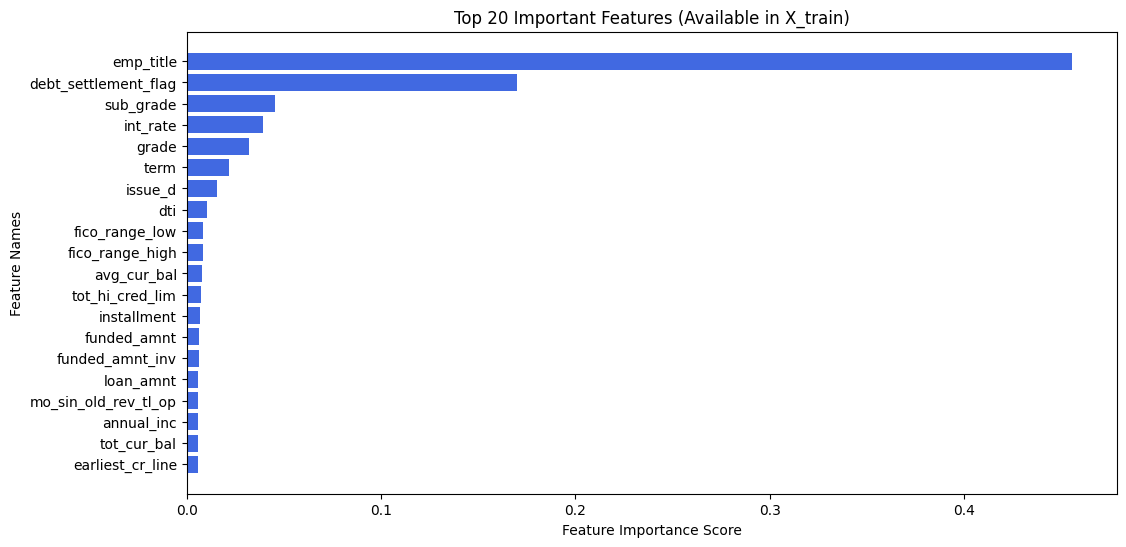

In [29]:
import matplotlib.pyplot as plt

# Step 1: Extract feature importance
feature_importance = my_pipeline.named_steps['model'].feature_importances_

# Step 2: Create a DataFrame with feature names and their importance scores
feature_df = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': feature_importance})

# Step 3: Sort by importance and get the top 20 features
top_20_features = feature_df.sort_values(by='Importance', ascending=False).head(20)['Feature'].tolist()

# Clean feature names to remove prefix (num__ or cat__)
cleaned_feature_names = [name.split("__")[-1] for name in top_20_features]

# Step 4: Check if all top 20 features exist in X_train
available_features = [col for col in cleaned_feature_names if col in X_train.columns]

# Step 5: Filter X_train to keep only the available top 20 features
X_train_filtered = X_train[available_features]

# Step 6: Save the filtered DataFrame as CSV
X_train_filtered.to_csv('X_train_top_20_features.csv', index=False)

# ✅ Fix the Bar Chart
plt.figure(figsize=(12, 6))

# Map original transformed feature names to their cleaned names for plotting
importance_scores = [feature_df[feature_df['Feature'] == orig]['Importance'].values[0] for orig in top_20_features]

plt.barh(cleaned_feature_names, importance_scores, color='royalblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Names")
plt.title("Top 20 Important Features (Available in X_train)")
plt.gca().invert_yaxis()  # Invert for better readability
plt.show()


In [30]:
new_df = pd.read_csv('X_train_top_20_features.csv')
new_df.head(10)


,emp_title,debt_settlement_flag,sub_grade,int_rate,grade,term,issue_d,dti,fico_range_low,fico_range_high,avg_cur_bal,tot_hi_cred_lim,installment,funded_amnt,funded_amnt_inv,loan_amnt,mo_sin_old_rev_tl_op,annual_inc,tot_cur_bal,earliest_cr_line
0,Musician - Organist,N,B5,11.49,B,36 months,Nov-2015,19.41,660.0,664.0,4645.0,31455.0,267.90,8125.0,8125.0,8125.0,199.0,34000.0,23227.0,Apr-1999
1,Fire Lieutenant,N,C5,16.02,C,60 months,Sep-2017,7.87,790.0,794.0,27084.0,158596.0,729.87,30000.0,30000.0,30000.0,158.0,65000.0,135421.0,Jun-2004
2,Driver / Operator,N,B1,9.44,B,36 months,Jan-2018,6.25,790.0,794.0,730.0,37710.0,128.02,4000.0,4000.0,4000.0,129.0,62000.0,3649.0,Sep-1997
3,sr computer operator,N,A5,7.89,A,36 months,Mar-2016,36.30,715.0,719.0,6385.0,109327.0,312.86,10000.0,10000.0,10000.0,114.0,40000.0,76622.0,Sep-1995
4,Life Enrichment Aide,N,B3,10.42,B,36 months,Aug-2017,19.00,720.0,724.0,424.0,20842.0,227.26,7000.0,7000.0,7000.0,123.0,12000.0,4241.0,May-2007
5,NaN,N,E2,24.37,E,36 months,Aug-2018,21.79,695.0,699.0,2958.0,31100.0,591.42,15000.0,15000.0,15000.0,57.0,20000.0,14788.0,Nov-2013
6,NC Dept of Health and Human Services,N,B5,13.05,B,36 months,Jul-2013,30.91,700.0,704.0,8772.0,96198.0,337.19,10000.0,10000.0,10000.0,163.0,75000.0,78951.0,Feb-2000
7,Desktop Support Technician,N,D5,21.49,D,60 months,Nov-2016,32.54,690.0,694.0,16323.0,431336.0,573.93,21000.0,21000.0,21000.0,81.0,60000.0,391763.0,Jul-1998
8,Landman,N,B5,11.48,B,36 months,Jan-2016,30.66,725.0,729.0,12588.0,296089.0,329.67,10000.0,10000.0,10000.0,256.0,140000.0,213989.0,Sep-1994
9,NaN,N,E3,21.49,E,60 months,Nov-2012,3.77,705.0,709.0,28624.0,363263.0,884.12,32350.0,32350.0,32350.0,211.0,285000.0,314869.0,Jun-1995


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [32]:
# Step 1: Select only the top 20 features in X_train and X_test
X_train_reduced = X_train[available_features]  
X_test_reduced = X_test[available_features] 

print(X_train_reduced)
print(X_test_reduced)

                        emp_title debt_settlement_flag sub_grade  int_rate  \
75146         Musician - Organist                    N        B5     11.49   
564052            Fire Lieutenant                    N        C5     16.02   
509162          Driver / Operator                    N        B1      9.44   
1020232      sr computer operator                    N        A5      7.89   
572511       Life Enrichment Aide                    N        B3     10.42   
...                           ...                  ...       ...       ...   
125303                 Accountant                    N        B4     10.99   
292629        Sr. Project Manager                    N        A5      7.89   
149897               Poker Dealer                    N        B3      9.99   
1116567                Bookkepper                    N        D1     15.77   
138529   Senior Account Executive                    N        A1      5.32   

        grade        term   issue_d    dti  fico_range_low  fic

In [33]:


# Step 1: Identify numerical and categorical features
categorical_features = [col for col in available_features if X_train[col].dtype == 'object']
numerical_features = [col for col in available_features if col not in categorical_features]

# Step 2: Define preprocessors
num_transformer = SimpleImputer(strategy="median")  # Replace missing values with median
cat_transformer = TargetEncoder()  # Encode categorical variables

# Step 3: Create ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

# Step 4: Define pipeline
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=50, max_depth=15, n_jobs=-1, random_state=42))
])

# Step 5: Hyperparameter tuning with GridSearchCV
param_grid = {
    'model__n_estimators': [25, 50, 75],  # 🔹 Reduce to 25-75 for better memory handling
    'model__max_depth': [10, 15],  
    'model__min_samples_split': [10, 20]  
}

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search.fit(X_train_reduced, y_train)



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['int_rate',
                                                                          'dti',
                                                                          'fico_range_low',
                                                                          'fico_range_high',
                                                                          'avg_cur_bal',
                                                                          'tot_hi_cred_lim',
                                                                          'installment',
                                                                          'funded_amnt',
                                                                          'funded_amnt_inv',
                                                                          'loan_amnt',
                                                                          'mo_sin_old_rev_tl_op',
                                                                          'annual_inc',
                                                                          'tot_cur_bal']),
                                                                        ('cat',
                                                                         TargetEncoder(),
                                                                         ['emp_title',
                                                                          'debt_settlement_flag',
                                                                          'sub_grade',
                                                                          'grade',
                                                                          'term',
                                                                          'issue_d',
                                                                          'earliest_cr_line'])])),
                                       ('model',
                                        RandomForestClassifier(max_depth=15,
                                                               n_estimators=50,
                                                               n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 15],
                         'model__min_samples_split': [10, 20],
                         'model__n_estimators': [25, 50, 75]},
             scoring='accuracy')

In [34]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Step 6: Evaluate best model
best_pipeline = grid_search.best_estimator_
# Predictions on Validation Set
y_valid_pred = best_pipeline.predict(X_valid)

# Model Evaluation
print("Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("Validation AUC-ROC:", roc_auc_score(y_valid, best_pipeline.predict_proba(X_valid)[:, 1]))
print("Classification Report:\n", classification_report(y_valid, y_valid_pred))


Validation Accuracy: 0.8245181090923085
Validation AUC-ROC: 0.7377619506466744
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90    167153
           1       0.67      0.20      0.31     40726

    accuracy                           0.82    207879
   macro avg       0.75      0.59      0.61    207879
weighted avg       0.80      0.82      0.78    207879



In [35]:


test_accuracy = best_pipeline.score(X_test_reduced, y_test)


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Parameters: {'model__max_depth': 15, 'model__min_samples_split': 20, 'model__n_estimators': 75}
Test Accuracy: 0.8213


In [36]:
import joblib

# Save the model
joblib.dump(best_pipeline,'/kaggle/working/churn_model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [37]:
import os
print(os.listdir('/kaggle/working/'))  # Should show 'churn_model.pkl'


['churn_model.pkl', '__notebook__.ipynb', 'X_train_top_20_features.csv']


In [38]:
import os

# List files in the current directory
print(os.listdir())


['churn_model.pkl', '__notebook__.ipynb', 'X_train_top_20_features.csv']


In [39]:
import joblib

# Load the model
try:
    loaded_model = joblib.load("churn_model.pkl")
    print("✅ Model loaded successfully!")
except Exception as e:
    print("❌ Error loading model:", e)


✅ Model loaded successfully!
